Recommendation Systems -> Non-personalized recommendation system by using the explore-exploit bayesian thinking 

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from math import gamma
import scipy
%matplotlib inline

## Simulate the beta distribution
 - We use the Beta-Binomail conjugate pairs to simulate this

Deriving the Beta function
 - Lets start by first understanding what is a Beta distribution

In [3]:
def beta_pdf(alpha,beta, arg):
    if arg >=0 and arg<=1:
        nr = arg**(alpha-1) * (1-arg)**(beta-1)
        dr = gamma(alpha)*gamma(beta)/gamma(alpha+beta)
    else:
        raise ValueError("The value of argument must be between 0 and 1")
    return nr/dr

Lets define multiple cases
 - A=B=1
 - A=B>1
 - A<B
 - A>B

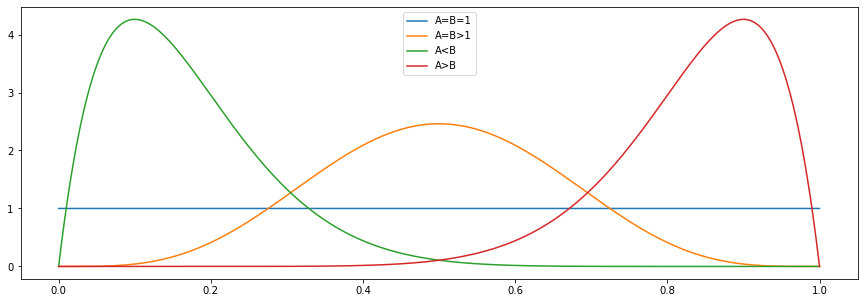

In [4]:
plt.figure(figsize = (15,5))
x_var = pd.Series(np.linspace(0,1,10000))
sn.lineplot(x = x_var,y = x_var.apply(lambda x: beta_pdf(1,1,x)), label = "A=B=1")
sn.lineplot(x = x_var,y = x_var.apply(lambda x: beta_pdf(5,5,x)), label = "A=B>1")
sn.lineplot(x = x_var,y = x_var.apply(lambda x: beta_pdf(2,10,x)), label = "A<B")
sn.lineplot(x = x_var,y = x_var.apply(lambda x: beta_pdf(10,2,x)), label = "A>B")
plt.legend(loc = "best")

Problem: Simulate a sample from a binomial distribution for which p is known. 
- Use MLE to find the value of P  (Frequentist Version)
- Use Bayesian Method to find the value of P

In [5]:
np.random.seed(25)
## Generate a population first
true_prob = 0.275
population = np.random.choice(a = [0,1], p = [1-true_prob,true_prob], size=100000)
sample = np.random.choice(a = population, size = 10000)

## Implementing MLE
def LogLikelihood(mu):
    return -1*np.sum(sample*np.log2(mu)+ (1-sample)*np.log2(1-mu))

optimization_result = scipy.optimize.minimize(fun = LogLikelihood,x0=0.5,method = "L-BFGS-B", bounds = [(0.00000001,0.9999999999)])
print(optimization_result.x)  

[0.27479996]


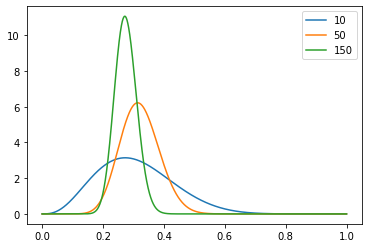

In [6]:
## Now we will assume mu to be a distribution, we will collect data and update the value for mu

## Priors on A,B ---> Assumed any value between 0,1 is equally likely
A = 1
B = 1
x_var = pd.Series(np.linspace(0,1,10000))

for iter in range(2000):
    sample_collected = np.random.choice(population)
    ## Update the value of A and B
    A += sample_collected
    B +=-sample_collected+1
    if iter in [10,50,150]:
        sn.lineplot(x = x_var,y = x_var.apply(lambda x: beta_pdf(A,B,x)), label  = str(iter))
        # plt.axvline(np.dot(np.array(x_var),np.array(x_var.apply(lambda x: beta_pdf(A,B,x)))))
plt.show()

### Bandit Problem
Recommendation using the Bayesian Approach --> Explore and Exploit dilemma

Problem Statement: We have 3 items. There is a clickthrough rate for each of the item. We don't know what the true CTR is, in a real-world scenario. Let's use bayesian approach to rank the 3 items based on their clickthrough rate

In [7]:
class bandit():
    def __init__(self,p=0.5):
        self.a = 1
        self.b = 1
        self.p = p
    
    def pull(self):
        return 1 if np.random.rand()< self.p else 0
    
    def update(self,x):
        self.a += x
        self.b += 1-x
    
    def posterior_sample(self):
        return np.random.beta(self.a,self.b,1)[0]



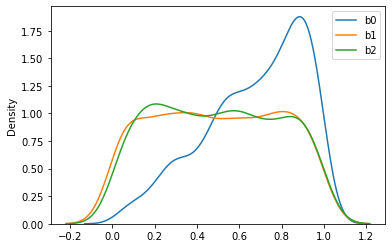

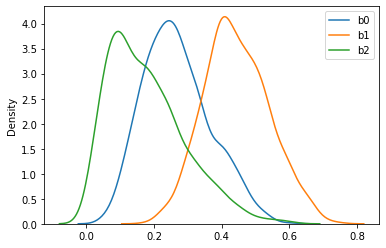

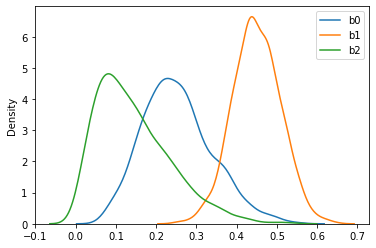

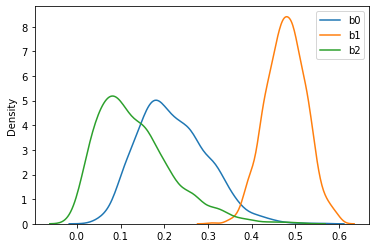

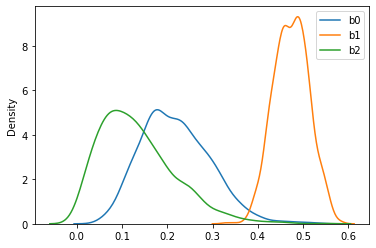

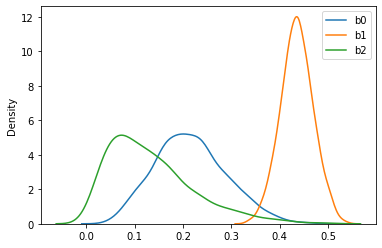

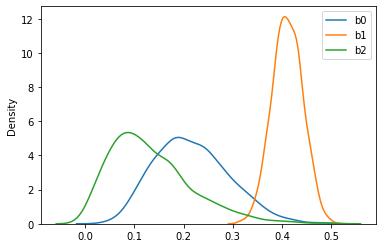

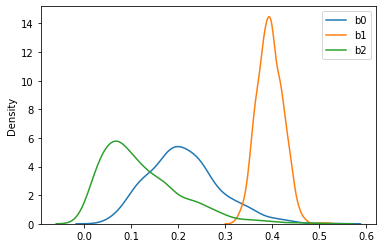

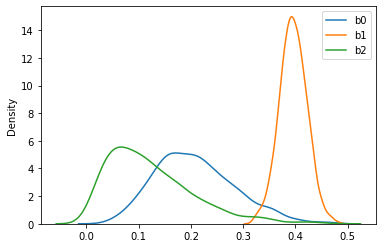

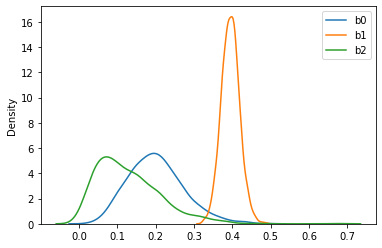

In [8]:
## Lets perform an experiment
## Define bandits
bandits = [bandit(prob) for prob in [0.1,0.4,0.25]] ## These are the true click through probabilities that we don't know initially
for iter in range(10000):
    ## Sample from them
    sample = [b.posterior_sample() for b in bandits]
    ## get the best bandit
    bestb = bandits[np.argmax(sample)]
    ## Collect data for the best bandit
    data = bestb.pull()
    ## update the distribution of the best bandit
    bandits[np.argmax(sample)].update(data)

    if iter%50 ==0 and iter <500:
        bandit_0 = np.random.beta(bandits[0].a, bandits[0].b, 1000)
        bandit_1 = np.random.beta(bandits[1].a, bandits[1].b, 1000)
        bandit_2 = np.random.beta(bandits[2].a, bandits[2].b, 1000)

        sn.kdeplot(bandit_0, label = "b0")
        sn.kdeplot(bandit_1, label ="b1")
        sn.kdeplot(bandit_2, label = "b2")
        plt.legend()
        plt.show()